<a href="https://colab.research.google.com/github/Satwikram/Deep-Learning-Notebooks/blob/master/Autoencoders/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
"""
@Author: Satwik Ram K

Autoencoders 

"""
# Importing Dependencies
import numpy as np # Linear Algebra
import tensorflow as tf
import keras

Using TensorFlow backend.


In [25]:
from keras.layers import Input, Dense
from keras.models import Model

In [26]:
# this is the size of our encoded representations
encoding_dim = 32 


In [27]:
# this is our input placeholder
input_img = Input(shape=(784,)) #Assuming

In [28]:
# "encoded" is encoded version of input
encoded = Dense(encoding_dim, activation = 'relu')(input_img)

In [29]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation = 'sigmoid')(encoded)

In [30]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [31]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [32]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [33]:
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [34]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [35]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
# Importing Dataset
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [37]:
# Normalizing the datasets
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [38]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [39]:
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])
"""

'\nimport matplotlib.pyplot as plt\n%matplotlib inline\nplt.imshow(x_train[0])\n'

In [40]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (x_test, x_test), verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.3599 - accuracy: 0.7521 - val_loss: 0.2718 - val_accuracy: 0.7946
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2653 - accuracy: 0.7969 - val_loss: 0.2557 - val_accuracy: 0.7965
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2460 - accuracy: 0.7966 - val_loss: 0.2343 - val_accuracy: 0.7960
Epoch 4/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2263 - accuracy: 0.7964 - val_loss: 0.2163 - val_accuracy: 0.7964
Epoch 5/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2107 - accuracy: 0.7976 - val_loss: 0.2028 - val_accuracy: 0.7982
Epoch 6/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1991 - accuracy: 0.7989 - val_loss: 0.1931 - val_accuracy: 0.7987
Epoch 7/50
60000/60000 [==============================] - 3s 50us/st

In [41]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

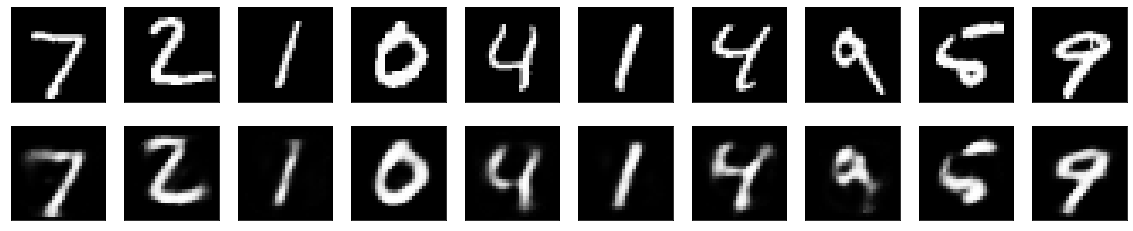

In [42]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()